In [13]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
X, y = make_blobs( centers=2, random_state=42)

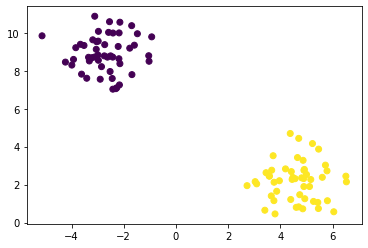

In [15]:
plt.scatter(X[:,0], X[:,1], c=y)

# Custom Logistic Regression

In [50]:
class CustomLogisticRegression:

  def __init__(self, lr=0.01, iters=20):
        self.__lr = lr
        self.__iters = iters

  def fit(self, X, y):

    self.__y = y.reshape(-1,1)
    X_mod = np.hstack([np.ones([len(X), 1]), X])
    self.__X = X_mod

    self.__theta = np.zeros([X_mod.shape[1], 1])

    err = []
    for i in range(self.__iters):
      err.append(self.error())
      self.gradient_ascend()

    self.theta_ = self.__theta

    return err

  def gradient_ascend(self):
    delta_theta = self.gradient()

    self.__theta -= delta_theta

  def gradient(self):
    yh = self.hypothesis(self.__X)
    ya = self.__y

    diff = -(ya - yh)

    return np.dot(self.__X.T, diff) * self.__lr


  def hypothesis(self, X):
    prod = np.dot(X, self.__theta)

    return 1 / (1 + np.exp(-prod))

  def error(self):
      yh = self.hypothesis(self.__X)
      ya = self.__y
      ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)
        # print(ll.shape) # (100, 1)
      return -np.mean(ll)

  def predict(self, X):
     X_mod = np.hstack([np.ones([len(X), 1]), X])
     yh = self.hypothesis(X_mod)

     return (yh > 0.5).astype(int).flatten()

  def score(self, X, y):
    yp = self.predict(X)

    return np.mean(yp == y)


In [17]:
model = CustomLogisticRegression()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [19]:
error = model.fit(X_train, y_train)

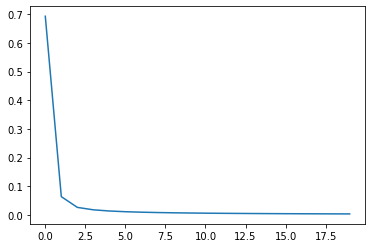

In [20]:
plt.plot(error)

In [21]:
model.score(X_test, y_test)

1.0

In [22]:
# plt.scatter(X[:, 0], X[:, 1], c=y)

# for i,(coef, intercept) in enumerate(zip(model.coef_, model.intercept_)):
#   x2_sample = -coef[0]/coef[1] * x1_sample - intercept/coef[1]
#   plt.plot(x1_sample, x2_sample, color=colors[i])

In [23]:
# model.coef_, model.intercept_

In [24]:
model2 = LogisticRegression()

In [25]:
err =model2.fit(X_train, y_train)

In [28]:
model2.coef_, model2.intercept_

(array([[ 0.93937244, -0.76809087]]), array([3.51647066]))

In [47]:
x1_sample = np.linspace(-5, 5)

In [48]:
# colors = ["red", "blue"]

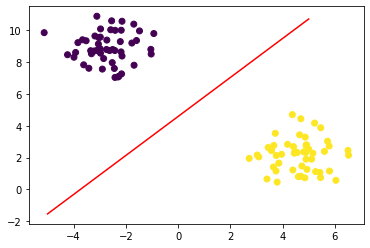

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y)

for i,(coef, intercept) in enumerate(zip(model2.coef_, model2.intercept_)):
  x2_sample = -coef[0]/coef[1] * x1_sample - intercept/coef[1]
  plt.plot(x1_sample, x2_sample, color="red")